In [1]:
import os
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/animal_dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
config = {
    "CATEGORIES": ["cat", "dog", "panda"],
    "IMG_SIZE": 32,
    "TRAIN_DATA": []
}

print(config["CATEGORIES"])


['cat', 'dog', 'panda']


In [4]:
CATEGORIES = config["CATEGORIES"]
IMG_SIZE = config["IMG_SIZE"]
TRAIN_DATA = config["TRAIN_DATA"]

In [5]:

for category in CATEGORIES:
    folder = os.path.join(dataset_path, category)
    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
    else:
        print(f"Folder exists: {folder}")

Folder exists: /content/drive/MyDrive/animal_dataset/cat
Folder exists: /content/drive/MyDrive/animal_dataset/dog
Folder exists: /content/drive/MyDrive/animal_dataset/panda


Loading images...



Loading panda: 100%|██████████| 100/100 [00:02<00:00, 39.37it/s]


Total images loaded: 300


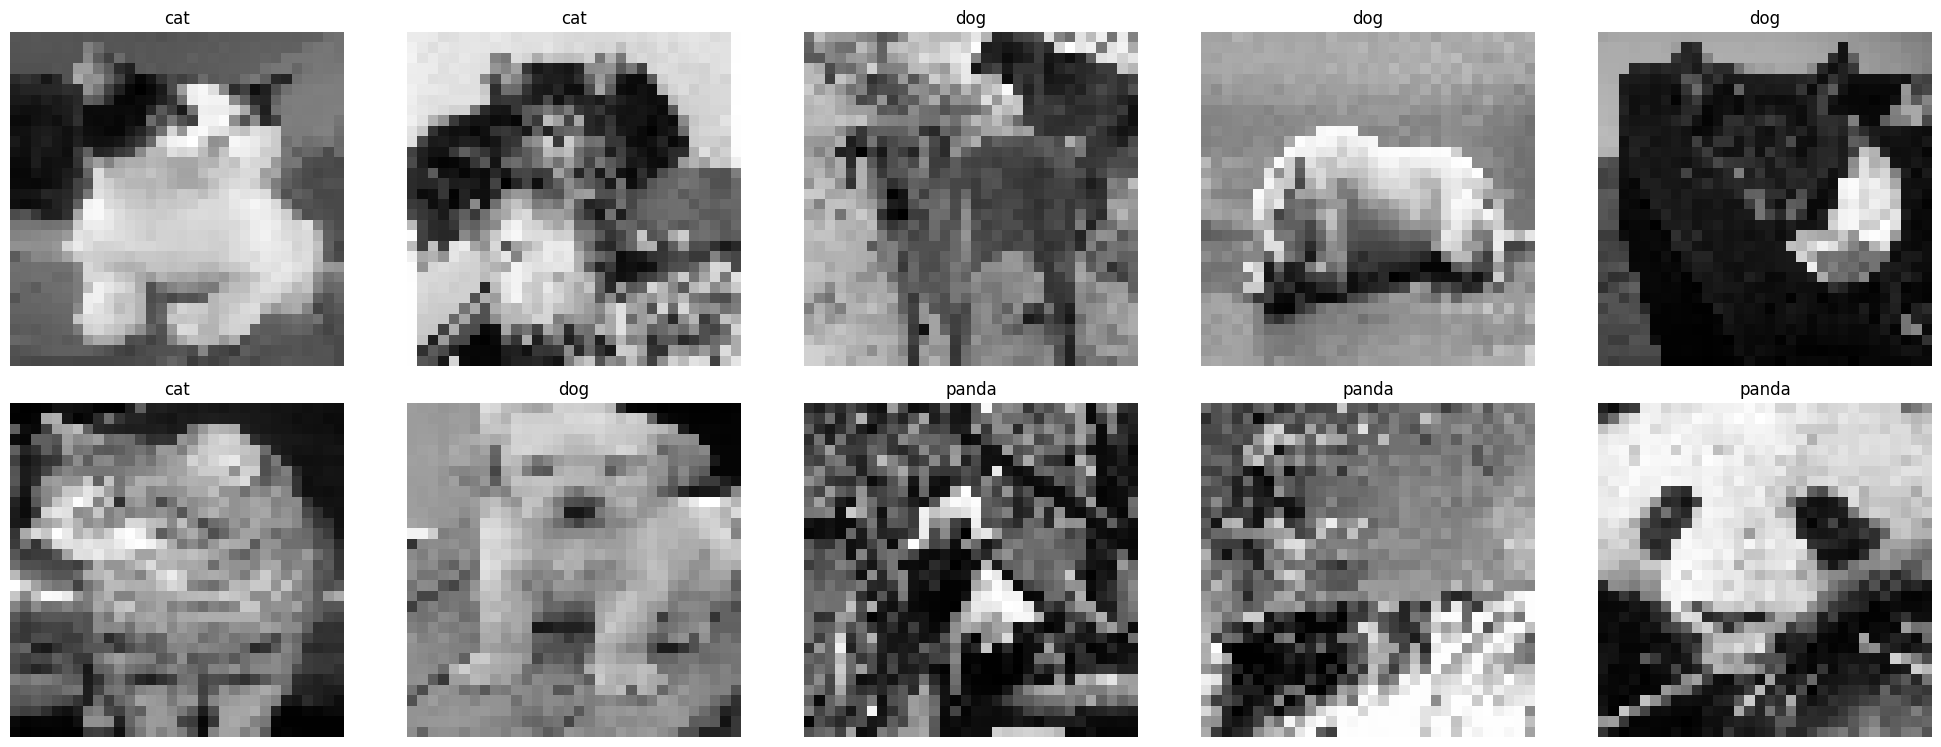

In [6]:
print("Loading images...\n")

for category in CATEGORIES:
    folder = os.path.join(dataset_path, category)
    class_id = CATEGORIES.index(category)

    for img_name in tqdm(os.listdir(folder), desc=f"Loading {category}"):
        img_path = os.path.join(folder, img_name)
        img = cv.imread(img_path)

        if img is None:
            continue

        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gray = cv.resize(gray, (IMG_SIZE, IMG_SIZE))

        TRAIN_DATA.append([gray, class_id])

print("Total images loaded:", len(TRAIN_DATA))
random.shuffle(TRAIN_DATA)

plt.figure(figsize=(20, 15))
for i in range(10):
    plt.subplot(4, 5, i + 1)
    plt.imshow(TRAIN_DATA[i][0], cmap="gray")
    plt.title(CATEGORIES[TRAIN_DATA[i][1]])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [7]:
f1 = TRAIN_DATA[0:60]
f2 = TRAIN_DATA[60:120]
f3 = TRAIN_DATA[120:180]
f4 = TRAIN_DATA[180:240]
f5 = TRAIN_DATA[240:300]

folds = [f1, f2, f3, f4, f5]

print("Fold sizes:", [len(f) for f in folds])

Fold sizes: [60, 60, 60, 60, 60]


In [8]:
import numpy as np

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [9]:
k_max = 10

k_values = list(range(1, k_max, 2))

fold_metrics_l1 = {k: [] for k in k_values}
fold_metrics_l2 = {k: [] for k in k_values}

print("k values:", k_values)

k values: [1, 3, 5, 7, 9]


In [10]:
for fold_index in range(5):
    validation = folds[fold_index]
    train = [item for j, f in enumerate(folds) if j != fold_index for item in f]

    correct_l1 = {k: 0 for k in k_values}
    correct_l2 = {k: 0 for k in k_values}


In [11]:
 for val_img, val_label in validation:

        dists_l1 = [(l1_dist(val_img, train_img), train_label) for train_img, train_label in train]
        dists_l2 = [(l2_dist(val_img, train_img), train_label) for train_img, train_label in train]

        dists_l1.sort(key=lambda x: x[0])
        dists_l2.sort(key=lambda x: x[0])

In [12]:
for k in k_values:

            neighbors = [label for _, label in dists_l1[:k]]
            pred = np.argmax(np.bincount(neighbors))
            if pred == val_label:
                correct_l1[k] += 1

            neighbors = [label for _, label in dists_l2[:k]]
            pred = np.argmax(np.bincount(neighbors))
            if pred == val_label:
                correct_l2[k] += 1


In [13]:
for k in k_values:
        fold_metrics_l1[k].append(correct_l1[k] / len(validation))
        fold_metrics_l2[k].append(correct_l2[k] / len(validation))

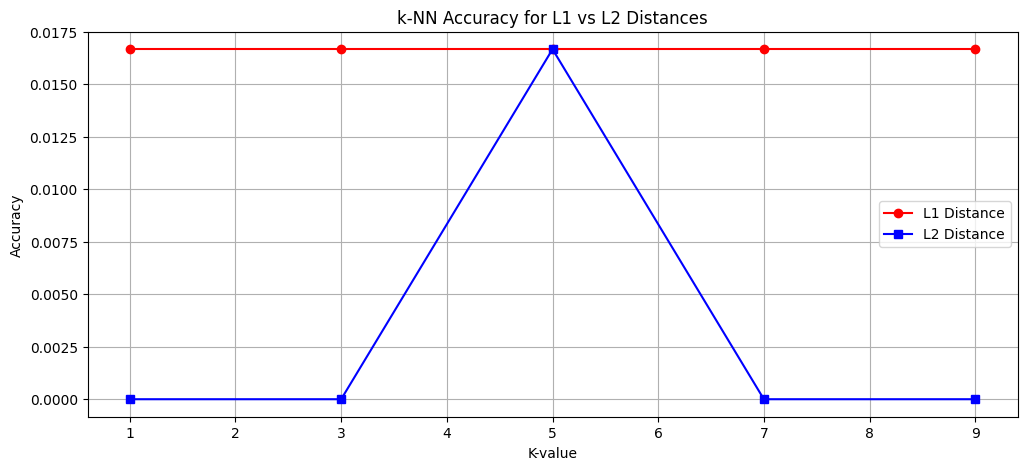

In [14]:

mean_l1 = [np.mean(fold_metrics_l1[k]) for k in k_values]
std_l1  = [np.std(fold_metrics_l1[k]) for k in k_values]

mean_l2 = [np.mean(fold_metrics_l2[k]) for k in k_values]
std_l2  = [np.std(fold_metrics_l2[k]) for k in k_values]


plt.figure(figsize=(12, 5))

plt.plot(k_values, mean_l1, label="L1 Distance", color="red", marker='o')
plt.plot(k_values, mean_l2, label="L2 Distance", color="blue", marker='s')

plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy for L1 vs L2 Distances")
plt.legend()
plt.grid(True)
plt.show()



Test Image True Label: cat
Pred L1: cat, Pred L2: cat
Top-5 L1 neighbors distances and labels:
1. cat (distance=0.00)
2. panda (distance=113959.00)
3. dog (distance=115109.00)
4. cat (distance=115769.00)
5. cat (distance=115886.00)


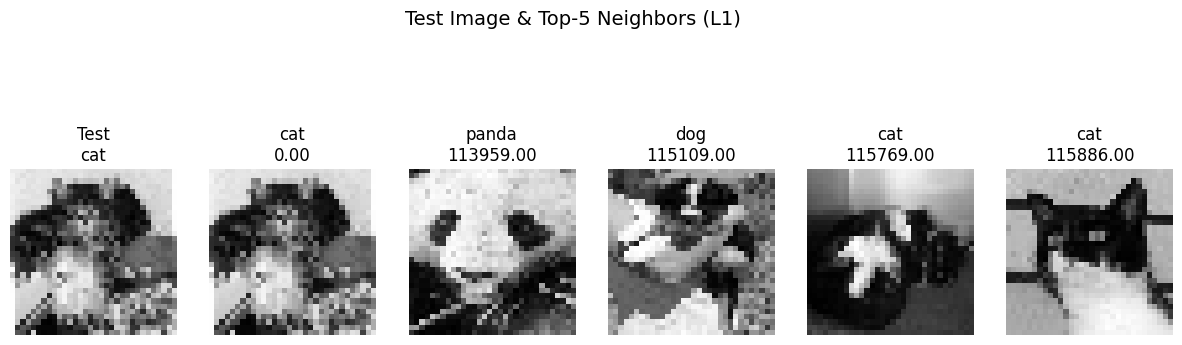

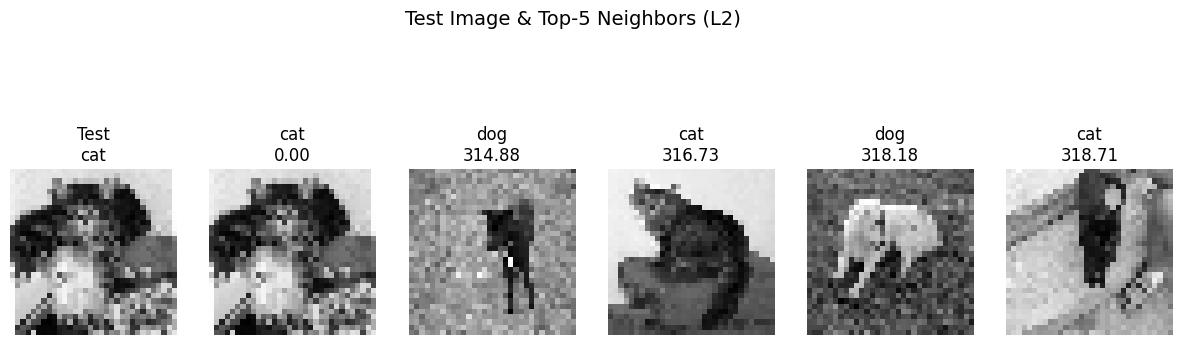


Test Image True Label: panda
Pred L1: panda, Pred L2: dog
Top-5 L1 neighbors distances and labels:
1. panda (distance=0.00)
2. dog (distance=89905.00)
3. dog (distance=103484.00)
4. panda (distance=103870.00)
5. panda (distance=104367.00)


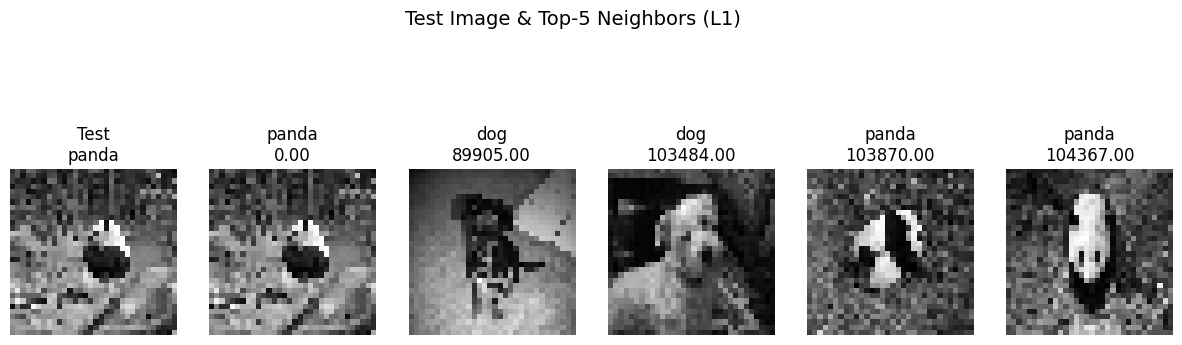

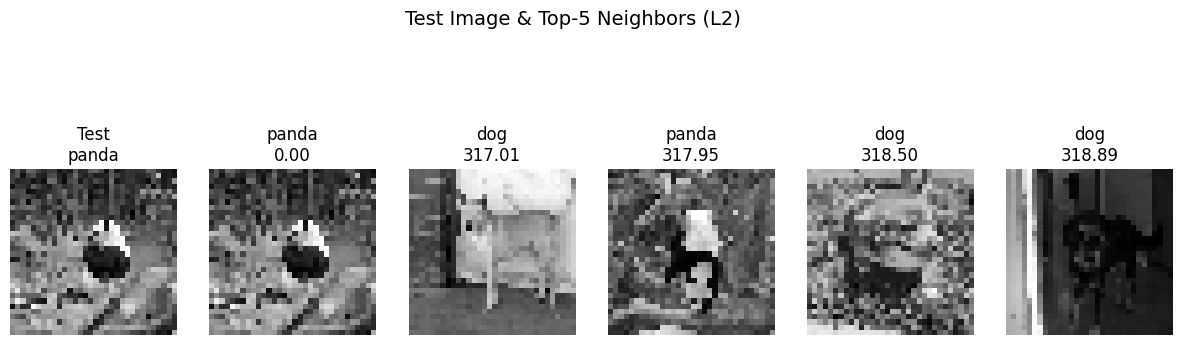


Test Image True Label: dog
Pred L1: cat, Pred L2: dog
Top-5 L1 neighbors distances and labels:
1. dog (distance=0.00)
2. cat (distance=98689.00)
3. dog (distance=102991.00)
4. cat (distance=104565.00)
5. cat (distance=107485.00)


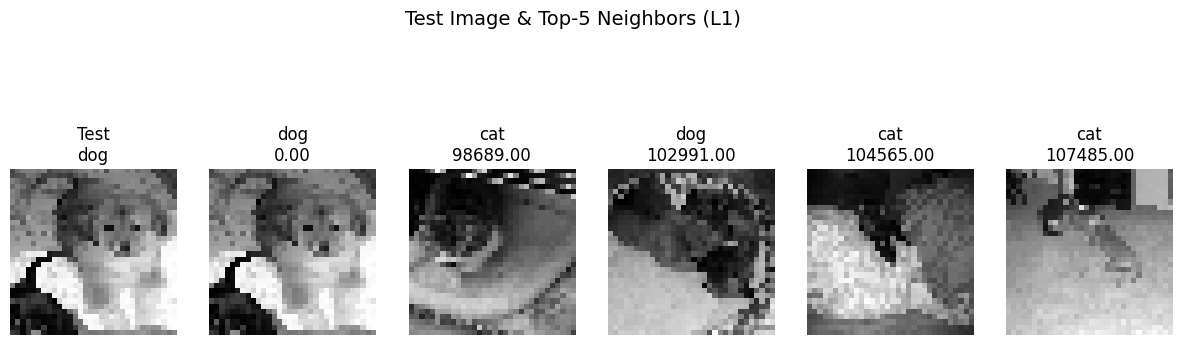

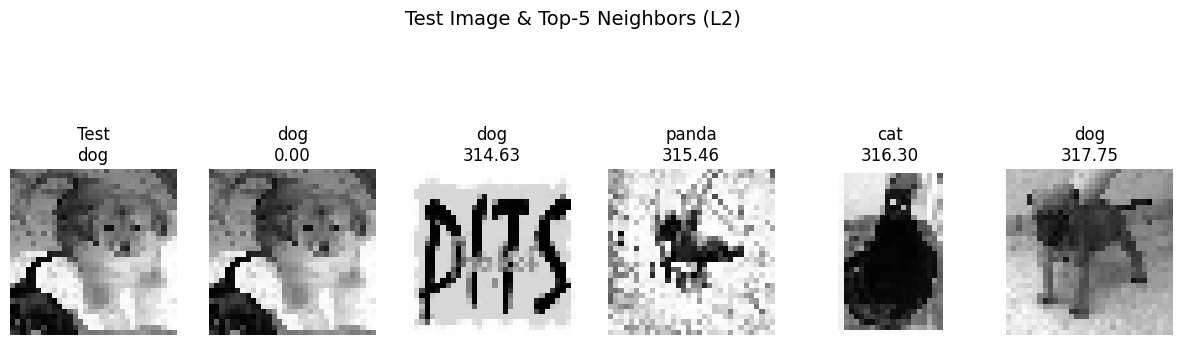


Test Image True Label: dog
Pred L1: dog, Pred L2: cat
Top-5 L1 neighbors distances and labels:
1. dog (distance=0.00)
2. cat (distance=87771.00)
3. dog (distance=91654.00)
4. panda (distance=94250.00)
5. dog (distance=94567.00)


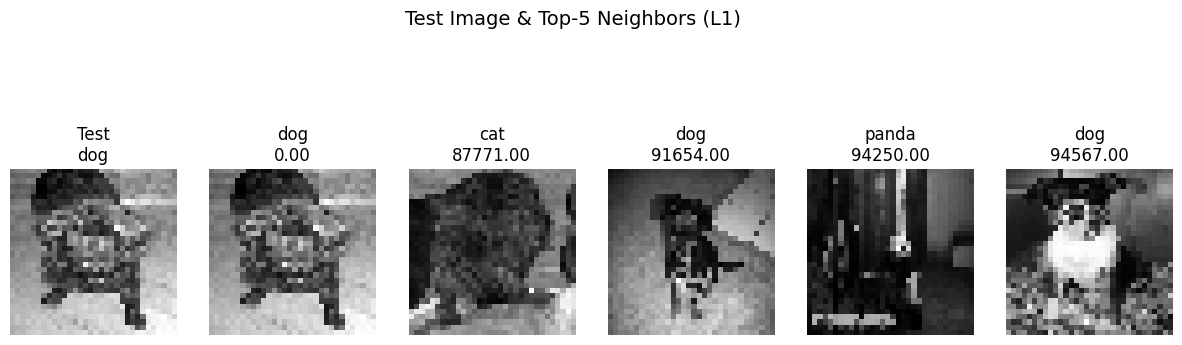

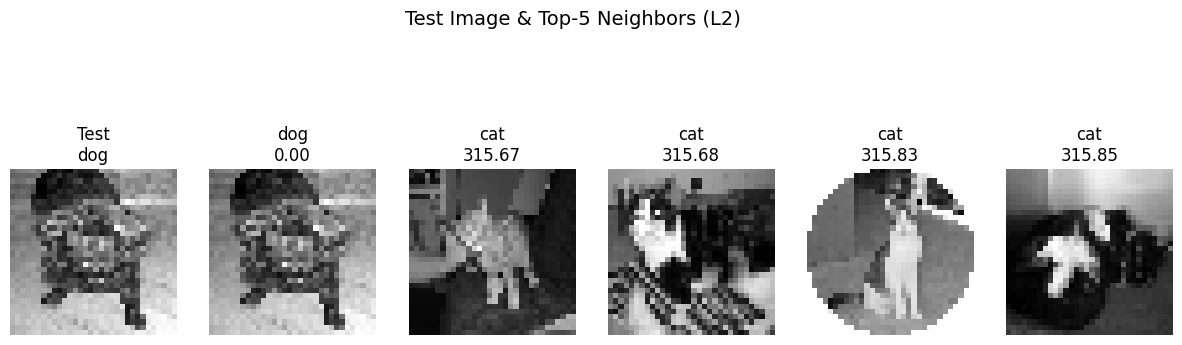


Test Image True Label: panda
Pred L1: panda, Pred L2: panda
Top-5 L1 neighbors distances and labels:
1. panda (distance=0.00)
2. panda (distance=89807.00)
3. panda (distance=90158.00)
4. dog (distance=92286.00)
5. dog (distance=94876.00)


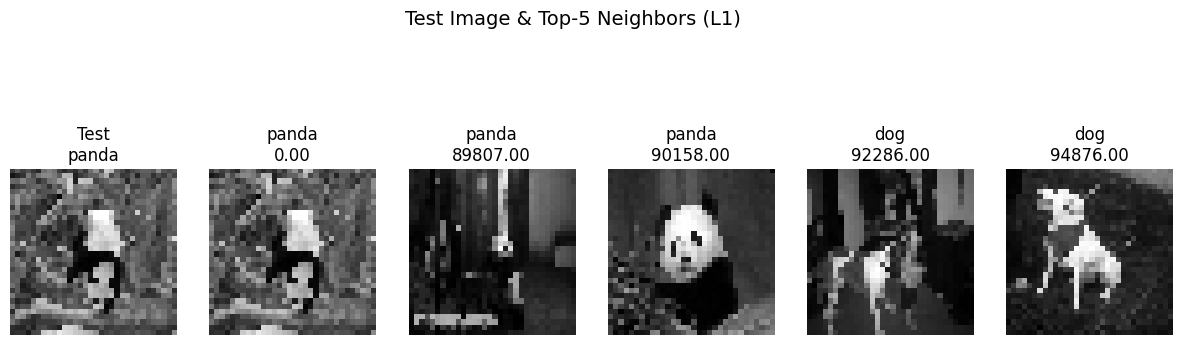

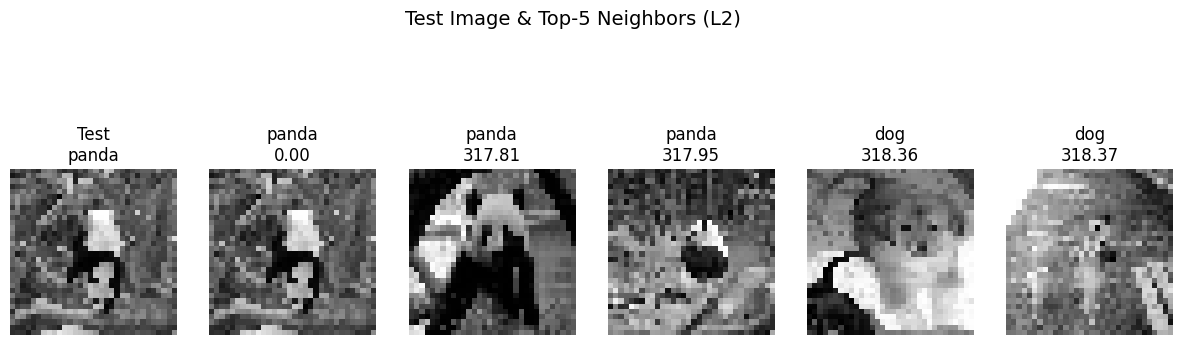

In [15]:

def show_knn_gallery(train_data, categories, test_count=5, k=5):

    test_indices = np.random.choice(len(train_data), test_count, replace=False)

    for idx in test_indices:
        test_image, true_label = train_data[idx]

        dists_l1 = [(l1_dist(test_image, img), label, img) for img, label in train_data]
        dists_l2 = [(l2_dist(test_image, img), label, img) for img, label in train_data]

        dists_l1.sort(key=lambda x: x[0])
        dists_l2.sort(key=lambda x: x[0])

        pred_l1 = np.argmax(np.bincount([label for _, label, _ in dists_l1[:k]]))
        pred_l2 = np.argmax(np.bincount([label for _, label, _ in dists_l2[:k]]))

        print(f"\nTest Image True Label: {categories[true_label]}")
        print(f"Pred L1: {categories[pred_l1]}, Pred L2: {categories[pred_l2]}")
        print("Top-5 L1 neighbors distances and labels:")
        for i in range(k):
            dist, lab, _ = dists_l1[i]
            print(f"{i+1}. {categories[lab]} (distance={dist:.2f})")

        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Test Image & Top-{k} Neighbors (L1)", fontsize=14)

        plt.subplot(1, k+1, 1)
        plt.imshow(test_image, cmap='gray')
        plt.title(f"Test\n{categories[true_label]}")
        plt.axis('off')

        for i in range(k):
            dist, lab, img = dists_l1[i]
            plt.subplot(1, k+1, i+2)
            plt.imshow(img, cmap='gray')
            plt.title(f"{categories[lab]}\n{dist:.2f}")
            plt.axis('off')

        plt.show()

        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Test Image & Top-{k} Neighbors (L2)", fontsize=14)

        plt.subplot(1, k+1, 1)
        plt.imshow(test_image, cmap='gray')
        plt.title(f"Test\n{categories[true_label]}")
        plt.axis('off')

        for i in range(k):
            dist, lab, img = dists_l2[i]
            plt.subplot(1, k+1, i+2)
            plt.imshow(img, cmap='gray')
            plt.title(f"{categories[lab]}\n{dist:.2f}")
            plt.axis('off')

        plt.show()


show_knn_gallery(TRAIN_DATA, CATEGORIES, test_count=5, k=5)
